# Some of the most useful functions of the amazing Scikit-learn library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #importing standard libraries

### import the data

In [4]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = heart_disease.drop("target", axis = 1) # features matrix
y = heart_disease["target"] #labels

### Split the data and fitting into the model

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
X_train, X_train.shape

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 296   63    0   0       124   197    0        1      136      1      0.0   
 92    52    1   2       138   223    0        1      169      0      0.0   
 236   58    1   0       125   300    0        0      171      0      0.0   
 197   67    1   0       125   254    1        1      163      0      0.2   
 185   44    1   0       112   290    0        0      153      0      0.0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 95    53    1   0       142   226    0        0      111      1      0.0   
 274   47    1   0       110   275    0        0      118      1      1.0   
 196   46    1   2       150   231    0        1      147      0      3.6   
 217   63    1   0       130   330    1        0      132      1      1.8   
 12    49    1   1       130   266    0        1      171      0      0.6   
 
      slope  ca  thal  
 296      1   0     2  
 92       2   4     2  
 2

In [8]:
X_test, X_test.shape

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 20    59    1   0       135   234    0        1      161      0      0.5   
 284   61    1   0       140   207    0        0      138      1      1.9   
 67    45    0   1       130   234    0        0      175      0      0.6   
 41    48    1   1       130   245    0        0      180      0      0.2   
 164   38    1   2       138   175    0        1      173      0      0.0   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 57    45    1   0       115   260    0        0      185      0      0.0   
 97    52    1   0       108   233    1        1      147      0      0.1   
 201   60    1   0       125   258    0        0      141      1      2.8   
 262   53    1   0       123   282    0        1       95      1      2.0   
 220   63    0   0       150   407    0        0      154      0      4.0   
 
      slope  ca  thal  
 20       1   0     3  
 284      2   1     3  
 6

In [9]:
y_train, y_train.shape

(296    0
 92     1
 236    0
 197    0
 185    0
       ..
 95     1
 274    0
 196    0
 217    0
 12     1
 Name: target, Length: 242, dtype: int64,
 (242,))

In [10]:
y_test , y_test.shape

(20     1
 284    0
 67     1
 41     1
 164    1
       ..
 57     1
 97     1
 201    0
 262    0
 220    0
 Name: target, Length: 61, dtype: int64,
 (61,))

### Sometimes all data wont be numeric and we must convert them, so the next step is transforming all the data into numeric 

In [11]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(transformers = [("one_hot", one_hot, categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)

In [14]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


### Taking care of missing data

In [15]:
car_sales_missing_data = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [16]:
car_sales_missing_data.dropna(subset = ["Price"], inplace = True)
car_sales_missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [17]:
X = car_sales_missing_data.drop("Price", axis = 1)
y = car_sales_missing_data["Price"] # splitting into X and y

### Filling missing values using Scikit-Learn library

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_feature),
                             ("num_imputer", num_imputer, num_features)
                            ])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [19]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colours", "Doors", "Price"])
car_sales_filled.head()

,Make,Colours,Doors,Price
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [20]:
car_sales_filled.isna().sum()

Make       0
Colours    0
Doors      0
Price      0
dtype: int64

In [21]:
len(car_sales_filled)

950

## Choosing the right estimator/algorithm for the problem

#### Refering Scikit-learn Choosing the right estimator map

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()

In [23]:
boston_data_frame = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_data_frame["target"] = pd.Series(boston["target"])
boston_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
len(boston_data_frame)

506

In [25]:
from sklearn.linear_model import Ridge

X = boston_data_frame.drop("target", axis = 1)
y = boston_data_frame["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6744014349041696

#### Trying Random forest regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_data_frame.drop("target", axis = 1)
y = boston_data_frame["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.873969014117403

### Choosing the estimator for classification problems

In [27]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
len(heart_disease)

303

Consulting the map, we areing linear SVC

In [33]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

C:\Users\gsaks\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8852459016393442

To improve the result, consulting the map trying RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

## Fit the model to our data and use it to make predictions

Learning about the fit method (Training)

In [35]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train) # By calling this method we are training the model (Telling it to find the patterns between X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

Making predictions using Machine Learning models

2 ways:
 
1.`predict()`
2.`predict_proba()`

In [36]:
clf.predict(X_test) # predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [37]:
np.array(y_test)   #truth

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)  # compare predictions to truth labels

0.8524590163934426

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 * `predict_proba()` returns the probabilities of the classification label.
    Helps us to understand how sure a label is, helping the decision

In [42]:
clf.predict_proba(X_test[:8])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05]])

`predict` can also be used for regression models

In [43]:
boston_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
from sklearn.ensemble  import RandomForestRegressor

X = boston_data_frame.drop("target", axis = 1)
y = boston_data_frame["target"]

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [51]:
y_preds[:10]

array([35.493, 28.618, 21.696, 32.033, 20.028, 28.071, 32.817, 13.694,
       15.181, 15.067])

In [53]:
np.array(y_test[:10])

array([37.3, 27.9, 18.5, 34.9, 24.5, 23.9, 37.2, 17.8, 19. , 13.4])

Comparing the predictions to the true value

mean_absolute_error returns the mean value of how far the actual data is from the predicted data

In [54]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.2035980392156866

## Evaluating a model 

1. Esitimator `score()` method

In [60]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [61]:
clf.score(X_train, y_train)

1.0

In [63]:
clf.score(X_test, y_test)

0.8524590163934426

For a regression model

In [71]:
from sklearn.ensemble import RandomForestRegressor

X = boston_data_frame.drop("target", axis = 1)
y = boston_data_frame["target"]

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [72]:
model.score(X_test, y_test)

0.9017248791293064

Evaluating model using scoring parameter

cross-validation returns the validations for the cv number of divisions of the dataset, taking each divison as test data, others as train data.
The default 'scoring' parameter is the scoring of the model (ex: mean accuracy of the given data in RandomForestClassifier)

In [73]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

cross_val_score(clf, X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [74]:
clf.score(X_test, y_test), np.mean(cross_val_score(clf, X, y, cv = 5)) # Comparing them

(0.8524590163934426, 0.8183606557377049)

## Classification model evaluation metrics

1. Accuracy

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [80]:
np.mean(cross_val_score(clf, X, y, cv = 5))

0.8248087431693989

* Area under the receiver operating characteristic curve (AUC/ROC)

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [84]:
y_probs = clf.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.05, 0.62, 0.55, 0.14, 0.79])

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive) # calculating fpr, tpr, thresholds

function for plotting ROC curve

In [86]:
def plot_roc_curve(fpr, tpr):
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color = "orange", label = "ROC")
    ax.set(title = "Receiver operating characteristics curve (ROC) curve",
           xlabel = "False positive rate",
           ylabel = "True positive rate")
    ax.legend()    

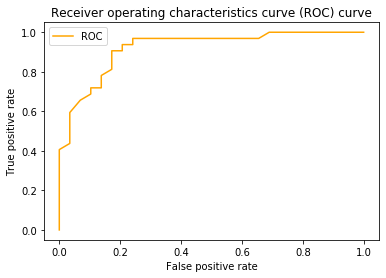

In [87]:
plot_roc_curve(fpr, tpr)

In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9202586206896551

**Confusion matrix**

Ideas about where the model is getting consfued

In [91]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [92]:
pd.crosstab(y_test,
            y_preds, 
            rownames=["Actual labels"],
           colnames =["predicted labels"])

predicted labels,0,1
Actual labels,,
0,24,5
1,5,27


Plotting

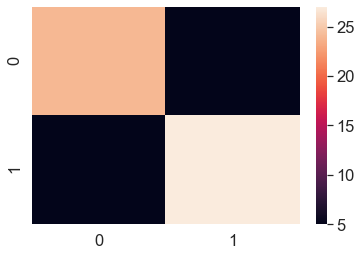

In [93]:
import seaborn as sns

sns.set(font_scale = 1.5)

sns.heatmap(confusion_matrix(y_test, y_preds))

In [97]:
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat, annot = True, cbar = False)
    ax.set(title = "confusion matrix using seaborn's heatmap", 
           xlabel = "True label", 
           ylabel = "predicted label")

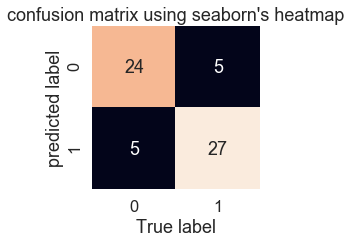

In [98]:
plot_conf_mat(confusion_matrix(y_test, y_preds))

**Classification report**

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Summarizing 

* Accuracy
    is a good measure to start with if all cases are balanced 
* precision and recall
    when classes are imbalanced
    
If false positive predictions are worse than false negative, aim for higher precisions.
If false negative precisions are worse than false positive, aim for higher recall

* F1 score 
     combination of precisions and recall

### Regression model evaluation metrics

1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3.  Mean squared error (MSE)

In [118]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_data_frame.drop("target", axis = 1)
y = boston_data_frame["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [119]:
model.score(X_test, y_test)

0.873969014117403

MAE

Average of absolute differences bw predictions and actrual values

In [123]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [126]:
pd.DataFrame(data = {
    "actual values":y_test, 
    "predicted values":y_preds, 
    "dfferences": y_preds - y_test
})

,actual values,predicted values,dfferences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


MSE


In [129]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [132]:
np.mean((y_preds - y_test) ** 2) 

9.24232899019608

Min MAE and MSE as much as possible 

## Using the `scoring` parameter

1. classification problems

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier();

In [136]:
cross_val_score(clf, X, y, scoring="accuracy")

array([0.85245902, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

In [137]:
np.mean(cross_val_score(clf, X, y, scoring = "accuracy"))

0.8181420765027323

In [139]:
cross_val_score(clf, X, y, scoring = "precision")

array([0.80555556, 0.93548387, 0.83870968, 0.82352941, 0.76315789])

In [140]:
np.mean(cross_val_score(clf, X, y, scoring = "precision"))

0.8289423254495558

In [144]:
cross_val_score(clf, X, y, scoring = "recall")

array([0.87878788, 0.84848485, 0.78787879, 0.84848485, 0.81818182])

In [145]:
np.mean(cross_val_score(clf, X, y, scoring = "recall"))

0.8545454545454545

In [146]:
cross_val_score(clf, X, y, scoring = "f1")

array([0.87323944, 0.89230769, 0.83076923, 0.8       , 0.82352941])

In [147]:
np.mean(cross_val_score(clf, X, y, scoring = "f1"))

0.8318100013973588

2.  Regression problems

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = boston_data_frame.drop("target", axis = 1)
y = boston_data_frame["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

In [152]:
cross_val_score(model, X, y, cv = 5)

array([0.77985282, 0.851655  , 0.73365078, 0.47364909, 0.31458526])

In [153]:
np.mean(cross_val_score(model, X, y, cv = 5))

0.6148561428372832

In [155]:
cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_absolute_error")

array([-2.12247059, -2.51736634, -3.36419802, -3.88855446, -3.17372277])

In [156]:
np.mean(cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_absolute_error"))

-3.005167520869733

In [157]:
cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_squared_error")

array([ -8.0710048 , -13.25581239, -19.95163875, -47.28505715,
       -19.04652867])

In [158]:
np.mean(cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_squared_error"))

-21.4979695749369

## Using different evaluation metrics as Scikit learn functions

1. Classification problems

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier dataset on test")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"precision: {precision_score(y_test, y_preds)}")
print(f"recall {recall_score(y_test, y_preds)}")
print(f"F1 score {f1_score(y_test, y_preds)}")

Classifier dataset on test
Accuracy: 81.97%
precision: 0.8387096774193549
recall 0.8125
F1 score 0.8253968253968254


regression

In [163]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = boston_data_frame.drop("target", axis = 1)
y = boston_data_frame["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Regression model metrics on the test")
print(f"r squared {r2_score(y_test, y_preds)}")
print(f"mean absolute error {mean_absolute_error(y_test, y_preds)}")
print(f"mean squared error {mean_squared_error(y_test, y_preds)}")

Regression
r squared 0.7966173094721649
mean absolute error 2.327137254901961
mean squared error 14.21710552941176


## Improving a model

First predictions = baseline predictions

First model = baseline model

parameters = models find these patters in the data.
hyperparameters = settings on a model you can adjust to potentially improve its abilities to find patterns.

Three ways to adjust hyperparameters:
    
1. By hand
2. Randomly with RandomSearchCV
3.  exhaustively with GridSearchCV

In [166]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params() #These are the hyperparameters one can change

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning hyperparameters by hand


3 sets of data, 

training

validation

test

In [168]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [173]:
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac = 1)

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled))
train_valid = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:train_valid], y[train_split:train_valid]
X_test, y_test = X[train_valid:], y[train_valid:]

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [177]:


np.random.seed(42)
clf2 = RandomForestClassifier(n_estimators = 100, max_depth = 10, max_leaf_nodes = 10)

clf2.fit(X_train, y_train)

y_preds_2 = clf2.predict(X_valid)

tuned_metrix = evaluate_preds(y_valid, y_preds_2)

Acc: 84.44%
Precision: 0.82
Recall: 0.92
F1 score: 0.87


## Tuning with RandomSearchCV

In [178]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}  #setting up parameter grid

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # 'rs' is short for RandomizedSearch

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.3s
[CV] n_estimators=1200, min_samples_split=2, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [179]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [180]:
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 84.78%
Precision: 0.88
Recall: 0.84
F1 score: 0.86


## Hyperparameter tuning with GridSearchCV.

In [181]:
from sklearn.model_selection import GridSearchCV

# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   46.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [182]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [183]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 84.78%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


## Compare metrics

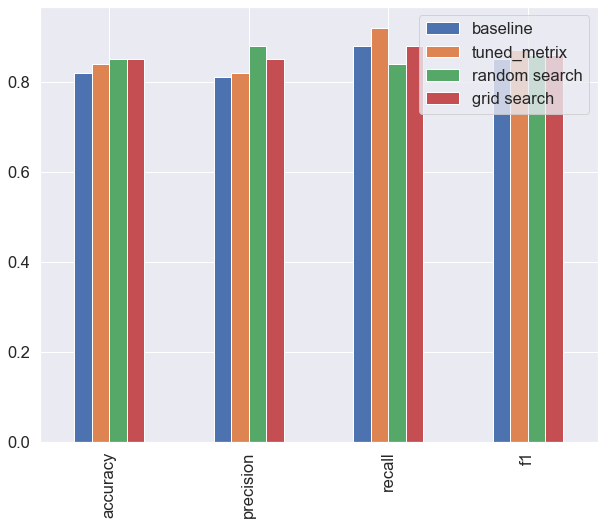

In [186]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "tuned_metrix":tuned_metrix,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## Saving and loading machine learning models

**Pickle**

In [188]:
import pickle

pickle.dump(gs_clf, open("grid_search_random_forest.pkl", "wb"))

In [189]:
loaded_pickle_model = pickle.load(open("grid_search_random_forest.pkl", "rb"))

In [191]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 84.78%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

**Joblib**

If the model is large, use Joblib which is good in carrying large nparrays

In [195]:
from joblib import load, dump

dump(gs_clf, filename="grid_search_random_forest_1.joblib")

['grid_search_random_forest_1.joblib']

In [196]:
loaded_job_model = load(filename = "grid_search_random_forest_1.joblib")

In [198]:
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 84.78%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

## Putting it all together 

In [201]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

### Using GridSearchCV with regression pipeline

In [203]:
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   3.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [204]:
gs_model.score(X_test, y_test)

0.3339554263158365